# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

The below cell imports all the libraries being used in the project and also 
loads the train, test and validation data for the project.

Alternatively i obtained the validation data for the project from training data using train_test_split function from sklearn.model_selection library. This way was used when i initially started working on this project. So i commented the data obtaining from validation data set.

Converts test train and validation data into gray scale using rgb2gray function from opencv library

In [1]:
# Load pickled data
import tensorflow as tf
import pickle
import numpy as np
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from skimage.color import rgb2gray
tf.reset_default_graph()
import cv2
from PIL import Image
import scipy
import pandas as pd
import random
from skimage import color
from skimage import io
from sklearn.utils import shuffle
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from scipy import ndimage

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
validation_file = "./traffic-signs-data/valid.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)


X_train = []
X_test = []
X_valid = []
    
XX_train , y_train = train['features'], train['labels'] 
XX_test , y_test = test['features'], test['labels']
XX_valid , y_valid = valid['features'], valid['labels']

#X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size = 0.2,random_state = 0)


##asserting that length of features set is equal to labels
assert(len(XX_train) == len(y_train))
assert(len(XX_valid) == len(y_valid))
assert(len(XX_test) == len(y_test))



print(y_test[0:2])     
test_shape = test['coords']
print("test Image shape is {}",test_shape)
print("training Image Shape: {}".format(XX_train[0].shape))
print()
print("Training Set:   {} samples".format(len(XX_train)))
print("Validation Set: {} samples".format(len(XX_valid)))
print("Test Set:       {} samples".format(len(XX_test)))

[16  1]
test Image shape is {} [[ 6  5 48 49]
 [ 5  5 36 40]
 [ 6  6 43 47]
 ..., 
 [ 6  6 24 24]
 [ 5  6 43 44]
 [ 6  5 27 26]]
training Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

#X_valid, y_valid = shuffle(X_valid, y_valid)

# TODO: Number of training examples
n_train = len(XX_train)

# TODO: Number of testing examples.
n_test = len(XX_test)

# TODO: What's the shape of an traffic sign image?
image_shape = XX_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes =  len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


#print data type
print(XX_train.dtype)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
uint8


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

i have plotted the images randomnly picked from training file(after converting to RGB)

#Visualizing all the classes, atleast one from each class/label
This basically find's one match for every label and plot the appropriate image from dataset

training set has every class data with larger matches for each class.

##Took help of the project file uploaded in review(Daniel Prado)

Showing the 1st image found in the X_train set for each class:
34799 43


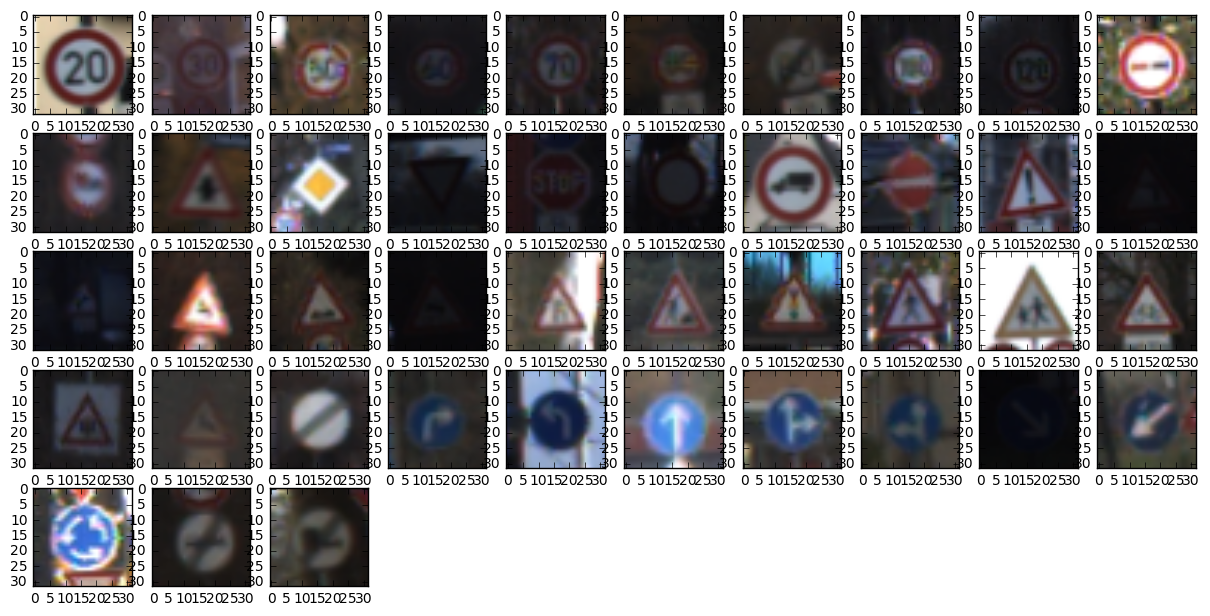

In [3]:
%matplotlib inline

plt.figure(figsize=(15,15))

print("Showing the 1st image found in the X_train set for each class:")
print(n_train,n_classes)

for i_class in range(n_classes):
    for j in range(n_train):
        if y_train[j] == i_class:
            plt.subplot(10, 10, i_class+1)
            plt.imshow(XX_train[j])
            break

#Now Visualizing various images belonging to a single class 

Mentioned in my project review comments to visualize various data from the dataset(train/test)

Showing the first 50 images found in the X_train set for a random Class:
Class: 0
[10073, 10038, 10001, 9975, 10138, 9971, 10022, 10000, 10102, 10046, 10076, 9989, 10035, 10061, 10080, 10131, 9968, 10058, 10110, 10112, 10132, 10014, 9991, 10072, 10039, 10123, 10040, 10135, 10023, 10128, 10063, 10085, 10109, 10028, 10012, 9983, 10032, 10018, 10100, 10056, 9990, 10090, 10054, 10043, 10009, 10041, 9969, 9978, 10115, 10116]


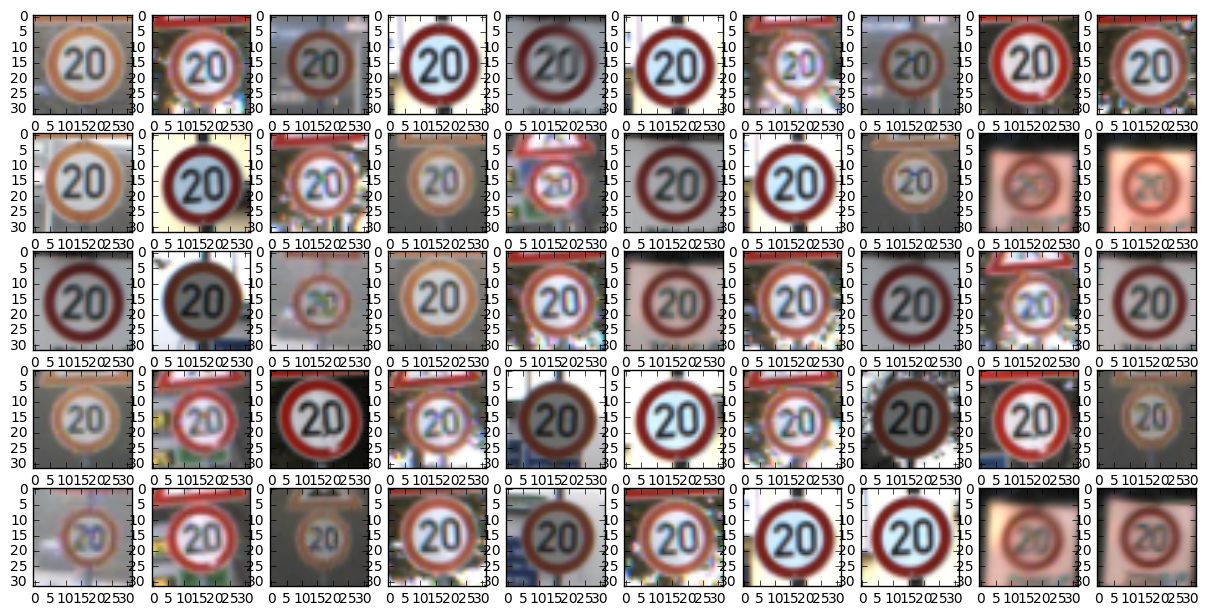

In [4]:
plt.figure(figsize=(15,15))

print("Showing the first 50 images found in the X_train set for a random Class:")

index = random.randint(0,len(X_train))
print("Class:", index)
list_class = [j for j in range(n_train) if y_train[j] == index]

list_show = random.sample(list_class, 50)
print(list_show)
i=0
for j in list_show:
    plt.subplot(10,10,i+1)
    plt.imshow(XX_train[j])
    i +=1

Data visualization of valid train and test in barchart format.

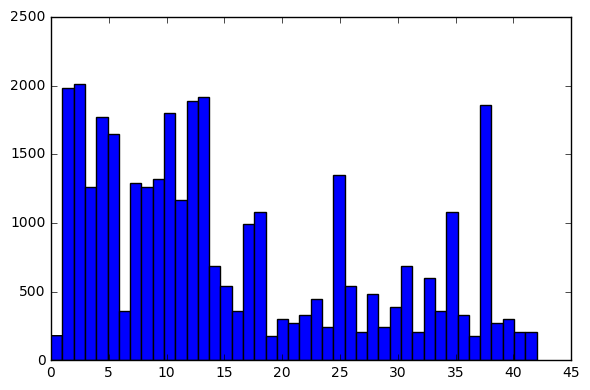

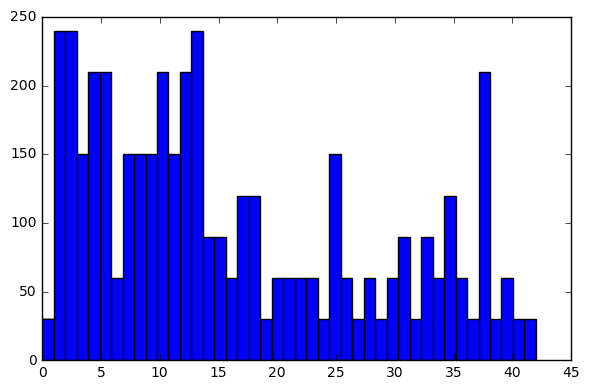

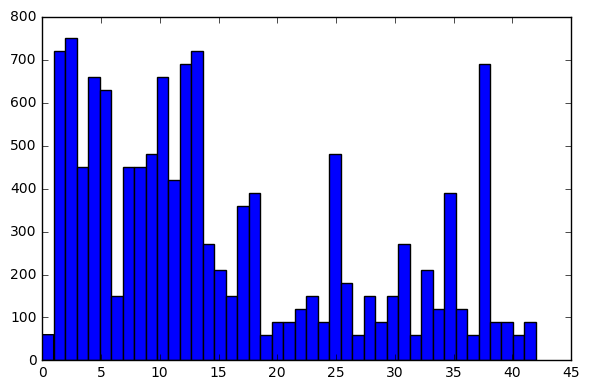

In [5]:
%matplotlib inline

fig,ax = plt.subplots()
n, bins, patches = ax.hist(y_train, n_classes, histtype='bar')
fig.tight_layout()
plt.show()

fig,ax = plt.subplots()
n, bins, patches = ax.hist(y_valid, n_classes, histtype='bar')
fig.tight_layout()
plt.show()

fig,ax = plt.subplots()
n, bins, patches = ax.hist(y_test, n_classes, histtype='bar')
fig.tight_layout()
plt.show()

The below images contains original image and rgb converted image.
In the conversion process to rgb, i have used sobel operator to convert image to xgradient style

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Pre processing the dataset, normalization, grayscale conversion etc.

Learned normalization procedure from the reference project

In [6]:
print ("Starting Normalization, Please wait .........")
print(XX_train.shape)


RGB2YUV = np.array( [[0.299, 0.587, 0.114],
                     [-0.14713, -0.28886, 0.436],
                     [0.615, -0.51499, -0.10001]])


Xyuv_train = np.dot(XX_train, RGB2YUV.T)
Xyuv_valid = np.dot(XX_valid, RGB2YUV.T)
Xyuv_test  = np.dot(XX_test,  RGB2YUV.T)

def normalize_image_array(img, nchannels):
    if nchannels == 1:
        for index in range(len(img)):
            img[index,:,:] -= np.mean(img[index,:,:])
            img[index,:,:] /= np.std(img[index,:,:])
    else:
        for index in range(len(img)):
            for channel in range(nchannels):  
                img[index,:,:,channel] -= np.mean(img[index,:,:,channel])
                img[index,:,:,channel] /= np.std(img[index,:,:,channel])
    
                
def normalize_image_array_simple(img):
    norm_img = (img.astype('float64') - 128.0) / 255.0
    return norm_img

Xy_train = Xyuv_train[:,:,:,0]
Xy_valid = Xyuv_valid[:,:,:,0]
Xy_test = Xyuv_test[:,:,:,0]

for i in range(len(Xy_train)):
    Xy_train[i,:,:]  = cv2.equalizeHist(Xy_train[i,:,:].astype(np.uint8))
    
for i in range(len(Xy_valid)):
    Xy_valid[i,:,:]  = cv2.equalizeHist(Xy_valid[i,:,:].astype(np.uint8))
    
for i in range(len(Xy_test)):
    Xy_test[i,:,:]  = cv2.equalizeHist(Xy_test[i,:,:].astype(np.uint8))
    
    
normalize_image_array(Xy_train,1)
normalize_image_array(Xy_valid,1)
normalize_image_array(Xy_test,1)


print(Xy_train.shape)

X_train = Xy_train
X_valid = Xy_valid
X_test = Xy_test

X_train = X_train.reshape(X_train.shape+(1,))
X_valid = X_valid.reshape(X_valid.shape+(1,))
X_test = X_test.reshape(X_test.shape+(1,))


print(X_train.shape)
print("Normalization finished!.")


X_train, y_train = shuffle(X_train, y_train)

Starting Normalization, Please wait .........
(34799, 32, 32, 3)
(34799, 32, 32)
(34799, 32, 32, 1)
Normalization finished!.


Visualizing the normalized and unnormalized image

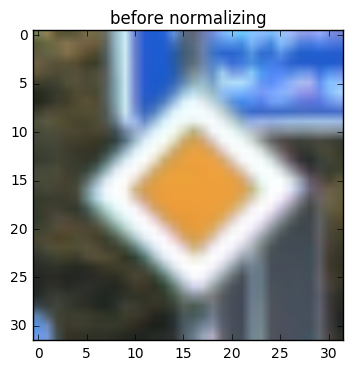

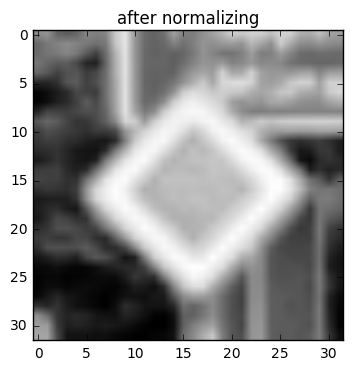

In [7]:
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0,len(X_valid))

plt.figure()
plt.imshow(XX_valid[index])
plt.title("before normalizing")
plt.figure()
plt.imshow(X_valid[index,:,:].reshape(32,32), cmap='gray')
plt.title("after normalizing")

### Question ( asked in review)
Prep processing steps and reasoning

1) Gray Scaling - by applying grayscaling , the no. of features in the image reduces since color images have more complexities with R, G and B components involved. In grayscale , there is just 1 component. This makes easier to make the model learn.

2) Blur operation - I tried sobel operator to see if it improves the training, but it didnt quite work since it is losing some important components. sobel operator again has different ouputs like normalized gradient, x gradient and y gradient. 

3) Expanded array dimension to pass into tensor flow.

4) Normalization - As mentioned in the review, Normalization is one of the pre processing steps used to overcome high contrast


### Model Architecture

### Define your architecture here.
### Feel free to use as many code cells as needed.

Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. 
Since Training dataset are color images, C is 3 in this case.

Architecture
Input to Layer 1 - 32*32*1
Layer 1: Convolutional. The output shape should be 28x28x6.
Activation. Your choice of activation function.
Pooling. The output shape should be 14x14x6.

Layer 2: Convolutional. The output shape should be 10x10x16.
Activation. Your choice of activation function.
Pooling. The output shape should be 5x5x16.
Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten, which is already imported for you.

Layer 3: Fully Connected. This should have 120 outputs.
Activation. Your choice of activation function.

Layer 4: Fully Connected. This should have 84 outputs.
Activation. Your choice of activation function.

Layer 5: Fully Connected (Logits). This should have 43 outputs.

Output
Return the result of the 2nd fully connected layer.

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Train your model here.
Calculate and report the accuracy on the training and validation set.
Once a final model architecture is selected, 
the accuracy on the test set should be calculated and reported as well.
Feel free to use as many code cells as needed.

In [8]:
EPOCHS = 30
BATCH_SIZE = 128

rate = 0.0015

KEEP_DROPOUT = 0.5

###Layer 1 and 2 outputs modified

modifying the L1 output size and layer  output size as suggested by mentor and reference project

Increasing L1 output size from 6 to 12.
Increasing L2 output size from 16 to 32.

Modified following layers accordingly to the new L1, L2 sizes.
Introducing Dropout in training phase, betweeb the FC layers, with a 0.5 probability, that worked better than 0.25 or 0.75.

In [9]:

def NewLeNet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    L1_output_size = 12
    L2_output_size = 32

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28xL1_output_size.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, L1_output_size), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(L1_output_size))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1],padding='VALID') + conv1_b

    # SOLUTION: Activation. and aving it for futrue use outside method
    conv1_relu = tf.nn.relu(conv1, name = "conv1_relu")
    
    # ADDING Dropout Layer
    conv1 =  tf.nn.dropout(conv1_relu,0.5)

    # SOLUTION: Pooling. Input = 28x28xL1_output_size. Output = 14x14xL1_output_size.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10xL2_output_size.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, L1_output_size, L2_output_size),mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(L2_output_size))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1],padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2_relu = tf.nn.relu(conv2, name = "conv2_relu")

    # SOLUTION: Pooling. Input = 10x10xL2_output_size. Output = 5x5xL2_output_size.
    conv2 = tf.nn.max_pool(conv2_relu, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5xL2_output_size. Output = 800.
    fc0   = flatten(conv2)
    
    ######################
    FC1_OUTPUT_SIZE = 120
    FC2_OUTPUT_SIZE = 84
    FC3_OUTPUT_SIZE = 43
    ######################

    # SOLUTION: Layer 3: Fully Connected. Input = 800. Output = FC1_OUTPUT_SIZE.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, FC1_OUTPUT_SIZE), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(FC1_OUTPUT_SIZE))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
     # Layer 3 Drop-out
    fc1 = tf.nn.dropout(fc1, keep_prob)
    

    # SOLUTION: Layer 4: Fully Connected. Input = FC1_OUTPUT_SIZE. Output = FC2_OUTPUT_SIZE.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(FC1_OUTPUT_SIZE, FC2_OUTPUT_SIZE), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(FC2_OUTPUT_SIZE))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Layer 4 Drop-out
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = FC2_OUTPUT_SIZE. Output = FC3_OUTPUT_SIZE.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(FC2_OUTPUT_SIZE, FC3_OUTPUT_SIZE), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(FC3_OUTPUT_SIZE))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    list = [logits, conv1_relu, conv2_relu]
    return list


x = tf.placeholder(tf.float32, (None, 32, 32, 1))#grayscale
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

list1 = NewLeNet(x)
logits = list1[0]
conv1_relu = list1[1]
conv2_relu = list1[2]

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)

##inserted
batch = tf.Variable(0, trainable=False)
starter_learning_rate = rate
learning_rate = tf.train.exponential_decay(starter_learning_rate, batch * BATCH_SIZE, 34799, 0.99, staircase=True)
##end_insertado


optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation, global_step = batch)




###Model evaluation

In [10]:
actual_prediction = tf.argmax(logits, 1)
correct_prediction = tf.equal(actual_prediction, tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



###Train the model

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        print("EPOCH {} ...".format(i+1))
        lr = sess.run(learning_rate)
        print("Learning Rate: ", lr)
        
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: KEEP_DROPOUT})
        
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        #print("EPOCH {} ...".format(i+1))
        print("Training Accuracy   = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './Newlenet')
    print("Model saved")


Training...

EPOCH 1 ...
Learning Rate:  0.0015
Training Accuracy   = 0.673
Validation Accuracy = 0.636

EPOCH 2 ...
Learning Rate:  0.001485
Training Accuracy   = 0.846
Validation Accuracy = 0.812

EPOCH 3 ...
Learning Rate:  0.00147015
Training Accuracy   = 0.902
Validation Accuracy = 0.866

EPOCH 4 ...
Learning Rate:  0.00145545
Training Accuracy   = 0.924
Validation Accuracy = 0.888

EPOCH 5 ...
Learning Rate:  0.00144089
Training Accuracy   = 0.947
Validation Accuracy = 0.915

EPOCH 6 ...
Learning Rate:  0.00142649
Training Accuracy   = 0.958
Validation Accuracy = 0.918

EPOCH 7 ...
Learning Rate:  0.00141222
Training Accuracy   = 0.969
Validation Accuracy = 0.943

EPOCH 8 ...
Learning Rate:  0.0013981
Training Accuracy   = 0.973
Validation Accuracy = 0.945

EPOCH 9 ...
Learning Rate:  0.00138412
Training Accuracy   = 0.972
Validation Accuracy = 0.941

EPOCH 10 ...
Learning Rate:  0.00137028
Training Accuracy   = 0.980
Validation Accuracy = 0.946

EPOCH 11 ...
Learning Rate:  0.00

Evaluate Results in Validation per cycle

In [12]:
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, './Newlenet')
    valid_images_pred = sess.run(actual_prediction,feed_dict={x:X_valid, keep_prob:1.0})

    Analyzing the data

In [13]:
print(len(valid_images_pred))
print(len(y_valid))

matches_correct = np.equal(valid_images_pred, y_valid)
stats_y = np.zeros_like(y_valid)

for i in range(len(matches_correct)):
    if matches_correct[i] == True:
        stats_y[ y_valid[i] ] += 1

for i in range(n_classes):
    total_per_class =(y_valid == i).sum()
    print("class {0:3d}   n_matches: {1:3d}   Total_per_class: {2:3d}   Ratio:{3:1.2f}"\
          .format(i, stats_y[i], total_per_class, stats_y[i]/total_per_class))

4410
4410
class   0   n_matches:  28   Total_per_class:  30   Ratio:0.93
class   1   n_matches: 233   Total_per_class: 240   Ratio:0.97
class   2   n_matches: 222   Total_per_class: 240   Ratio:0.93
class   3   n_matches: 149   Total_per_class: 150   Ratio:0.99
class   4   n_matches: 208   Total_per_class: 210   Ratio:0.99
class   5   n_matches: 202   Total_per_class: 210   Ratio:0.96
class   6   n_matches:  58   Total_per_class:  60   Ratio:0.97
class   7   n_matches: 148   Total_per_class: 150   Ratio:0.99
class   8   n_matches: 144   Total_per_class: 150   Ratio:0.96
class   9   n_matches: 150   Total_per_class: 150   Ratio:1.00
class  10   n_matches: 209   Total_per_class: 210   Ratio:1.00
class  11   n_matches: 149   Total_per_class: 150   Ratio:0.99
class  12   n_matches: 203   Total_per_class: 210   Ratio:0.97
class  13   n_matches: 239   Total_per_class: 240   Ratio:1.00
class  14   n_matches:  90   Total_per_class:  90   Ratio:1.00
class  15   n_matches:  90   Total_per_class:

###Test the Model with test.p dataset file (as provided)

In [14]:
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, './Newlenet')
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


Test Accuracy = 0.942


Test accuracy is less compared to validation accuracy but it is quite more than my first submission.
0.93 validation accuracy is the requirement.

This is mainly due to normalization of the images and increasing the outputs of the Layer 1 and Layer 2 which was also suggested by my mentor.

###Question 1


Describe how you performed preprocessing of data?

**Answer:-**

About the dataset, i got 2 files with extension type(.p). Both these files are protected files as i understood the extension. I extracted the dataset files using pickle library by storing them in a dedicated memory using the pickle.
We can reuse the data through out the project since we are saving them.
Next i converted the images(dataset) to gray and expanded the compatibility to work with tensor flow model.
Sobel operator was an experimented method i tried.

###Question 2

Describe how you set up the training, validation and testing data for your model. 
Optional: If you generated additional data, how did you generate the data? 
Why did you generate the data? 
What are the differences in the new dataset (with generated data) from the original dataset?

**Answer:-**

Validation and testing data I have used Pickle library to save the data.

Regarding the validation data, I have used sklearn.model_selection Library from python to take the random sample using the function train_test_split.

All of the images in the three sets are converted to Grey scale, to reduce the number of computations.

###Question 3

What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.) 
For reference on how to build a deep neural network using TensorFlow, 
see Deep Neural Network in TensorFlow from the classroom.

**Answer:-**

###Input
###The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. 
###Since Training dataset are color images, C is 3 in this case.

#Architecture
Input to Layer 1 - 32*32*1
Layer 1: Convolutional. The output shape should be 28x28x6.
Activation. Your choice of activation function.
Pooling. The output shape should be 14x14x6.

Layer 2: Convolutional. The output shape should be 10x10x16.
Activation. Your choice of activation function.
Pooling. The output shape should be 5x5x16.
Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is  by using tf.contrib.layers.flatten, which is already imported for you.

Layer 3: Fully Connected. This should have 120 outputs.
Activation. Your choice of activation function.

Layer 4: Fully Connected. This should have 84 outputs.
Activation. Your choice of activation function.

Layer 5: Fully Connected (Logits). This should have 43 outputs.
Output
Return the result of the 2nd fully connected layer.

###Question 4

How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)

**Answer:-**

Batch size - 128, Epochs - 15
Learning rate - 0.001

Tried Batch size - 106, Epochs - 15
Learning rate - 0.0015

Batch size - 128, Epochs - 30
Learning rate - 0.0015

When i increased the epochs to 30, my model got trained better and it improved the prediction of STOP sign from the new images sample downloaded from web.

###Question 5

What approach did you take in coming up with a solution to this problem? 
It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. 
Perhaps your solution involved an already well known implementation or architecture. 
In this case, discuss why you think this is suitable for the current problem

**Answer:-**

I tried various sets of image inputs.
Tried with color images, gray scale images. Sobel operator(X gradient), bluring image, sharpening image and sent to LeNet architecture.

Better accuracy was with grayscale images and X gradient images. Converting new images from web to (32*32*1) has created lot of noise.(more pre processing might be needed for these images)

LeNet architecture is simple compared to other complex architectures like GoogleNet, ResNet. This project aim is to identify different traffic images and classify them to their respective traffic sign

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [15]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

Question 6

Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook

Answer:-

i have tried with two different sets of images, 1st set of images are from germany berlin city and the next set of images from google german traffic sign images.

Blur and sobel operation didnt work well on these images. SO i tried with only rgb2gray conversion.


Load the images and plot them here
Feel free to use as many code cells as needed.
Run the predictions here and use the model to output the prediction for each image.
Make sure to pre-process the images with the same pre-processing pipeline used earlier.
Feel free to use as many code cells as needed.


Loading image new_images/1_Stop_14.jpg of type <class 'numpy.ndarray'> with dimensions: (32, 32, 3)
Loading image new_images/2_RoadWorks_25.jpg of type <class 'numpy.ndarray'> with dimensions: (32, 32, 3)
Loading image new_images/3_GoStraightorRight_36.jpg of type <class 'numpy.ndarray'> with dimensions: (32, 32, 3)
Loading image new_images/4_Turn Right ahead_33.jpg of type <class 'numpy.ndarray'> with dimensions: (32, 32, 3)
Loading image new_images/5_Bicycles crossing_29.jpg of type <class 'numpy.ndarray'> with dimensions: (32, 32, 3)


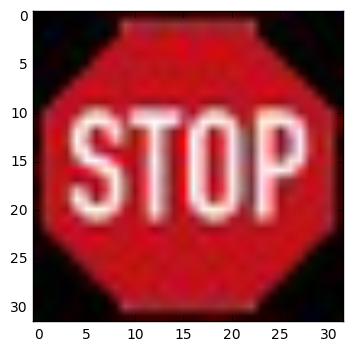

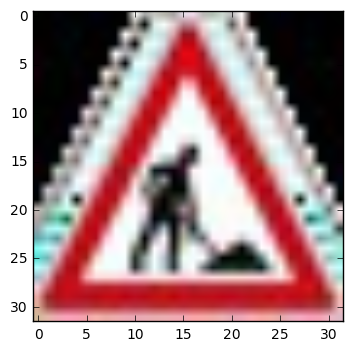

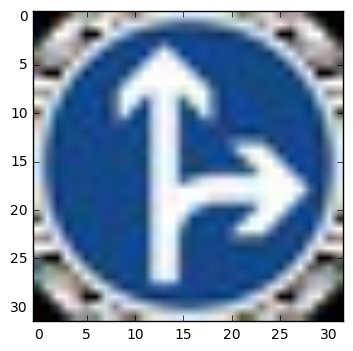

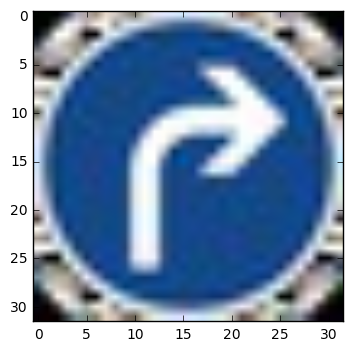

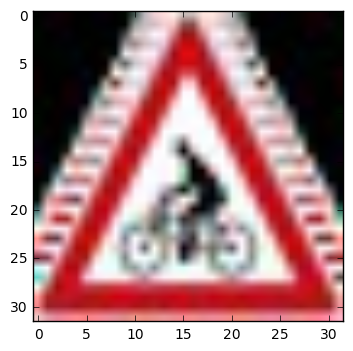

In [16]:
import os
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy.misc import imresize
get_ipython().magic('matplotlib inline')

list_images = os.listdir("new_images/")
#We exclude the images that begins with output
list_images = [file for file in list_images if not file.startswith('output') and not file.startswith('.')]

test_images = np.uint8(np.zeros((len(list_images),32,32,3)))

for i in range(len(list_images)):
    image_name = 'new_images/'+ list_images[i]
    #image = mpimg.imread(image_name)
    image = cv2.imread(image_name, cv2.IMREAD_COLOR)
    print('Loading image', image_name, 'of type', type(image), 'with dimensions:', image.shape)
    #image = imresize(image,(32,32), 'bicubic')
    
    b,g,r = cv2.split(image)
    test_images[i,:,:,:] = np.asarray(cv2.merge([r,g,b]), dtype='uint8')
    plt.figure()
    plt.imshow(test_images[i])

### Predict the Sign Type for Each Image

In [17]:
import csv
import tensorflow as tf

#read the traffic signs classes names
with open('signnames.csv') as f:
  reader = csv.reader(f)
  signnames = list(reader)

sample_images = np.zeros((len(list_images),32,32))

#normalization (same as done before for the Training, Validation and Test Sets)
for i in range(len(test_images)):
    img = (.299*test_images[i,:,:,0] + .587*test_images[i,:,:,1] + .114*test_images[i,:,:,2])
    img = cv2.equalizeHist(img.astype(np.uint8))
    img = img.astype('float64')
    img -= np.mean(img)
    img /= np.std(img)
    sample_images[i,:,:] = img

# Reshape for tensorflow
sample_images = sample_images.reshape(sample_images.shape+(1,))

#load the saved session and perform prediction on the latest test images
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, './Newlenet')
    test_images_pred = sess.run(actual_prediction, feed_dict={x: sample_images, keep_prob:1.0})

print("Predictions obtained and Now continue executing next cells.")

Predictions obtained and Now continue executing next cells.


### Analyze Performance

In [18]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

correct_classes_test = [14, 25, 36, 33, 29]
correct_labels_test = []
predicted_labels_test = []

for id in correct_classes_test:
    correct_labels_test.append((signnames[id+1][1]))
for id in test_images_pred:
    predicted_labels_test.append((signnames[id+1][1]))

i_image=0
for pred,correct in zip(predicted_labels_test, correct_labels_test):
    print("Image {0:1d} - Predicted Signal:{1:20s},  Actual Signal:{2:20s}".format(i_image,pred,correct))
    i_image+=1

print("Accuracy of the 5 New Images set: ", \
      (test_images_pred == correct_classes_test).sum()/len(test_images_pred))

    

Image 0 - Predicted Signal:General caution     ,  Actual Signal:Stop                
Image 1 - Predicted Signal:Road work           ,  Actual Signal:Road work           
Image 2 - Predicted Signal:Go straight or right,  Actual Signal:Go straight or right
Image 3 - Predicted Signal:Turn right ahead    ,  Actual Signal:Turn right ahead    
Image 4 - Predicted Signal:Beware of ice/snow  ,  Actual Signal:Bicycles crossing   
Accuracy of the 5 New Images set:  0.6


# Comparing the Prediction Accuracy to Models Accuracy

**Answer**

The new sample test accuracy has been 0.6 and 0.8 trying multiple times. 

For submission i used lower prediction accuracy because i wanted you understand that it was not 0.8 always because of STOP sign has not been predicted correctly in all trials.

So test accuracy of the test images provided with the project was 0.9400+ but the test sample accuracy was flying between 0.6 and 0.8.

This might be because of not enough samples of those signs in the training set with variable formats. As observed above the training images for Bicycle crossing is only 30. That might be one of the reason for misclassification of Bicycle crossing.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [19]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

#predict the top 5 labels for each test image
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, './Newlenet')
    top_5_pred = sess.run(tf.nn.top_k(tf.nn.softmax(logits), 5), feed_dict={x: sample_images, keep_prob: 1.0})


<class 'tensorflow.python.ops.gen_nn_ops.TopKV2'>


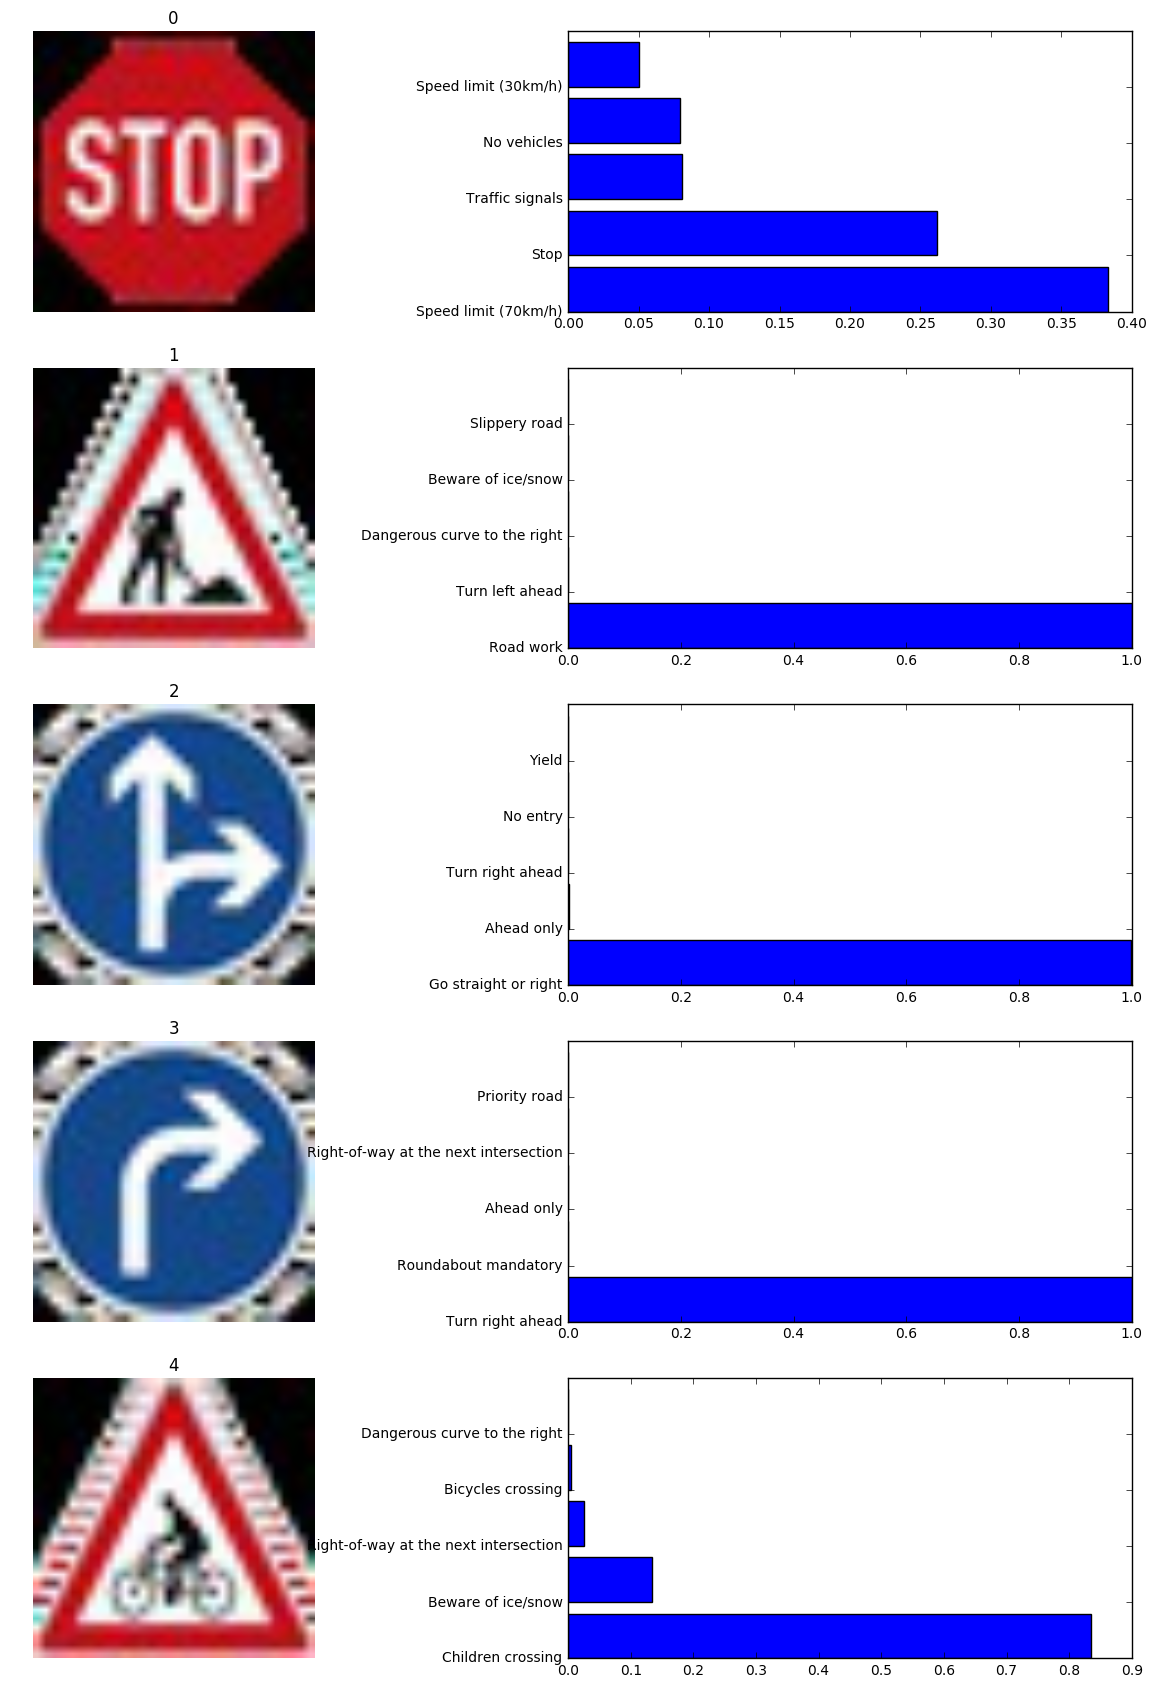

In [20]:
print(type(top_5_pred))

plt.figure(figsize=(16, 21))
for i in range(5):
    plt.subplot(5, 2, 2*i+1)
    plt.imshow(test_images[i], cmap='gray') 
    plt.title(i)
    plt.axis('off')
    plt.subplot(5, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), top_5_pred.values[i, :])
    labs=[signnames[j+1][1] for j in top_5_pred.indices[i]]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()

# Discussion on Softmax Probabilities?

**Answer**

Certainty and Uncertainty

Stop Sign - Its been uncertain since when i ran the network multiple times , some times stop sign has prediction of 0.6 and was ranked one on preiction but after running multiple times, it frequently kept changing to second and third.

Road Work , Go Straight or Right, Turn Right Ahead - All these three are very certain in their predictions

Bicycle Crossing - Its been the most uncertain and wrongly predicted Traffic sign from sample test images. Though Bicycle crossing is in the top 5 softmax probabilites, its percentage is almost negligible.

 Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


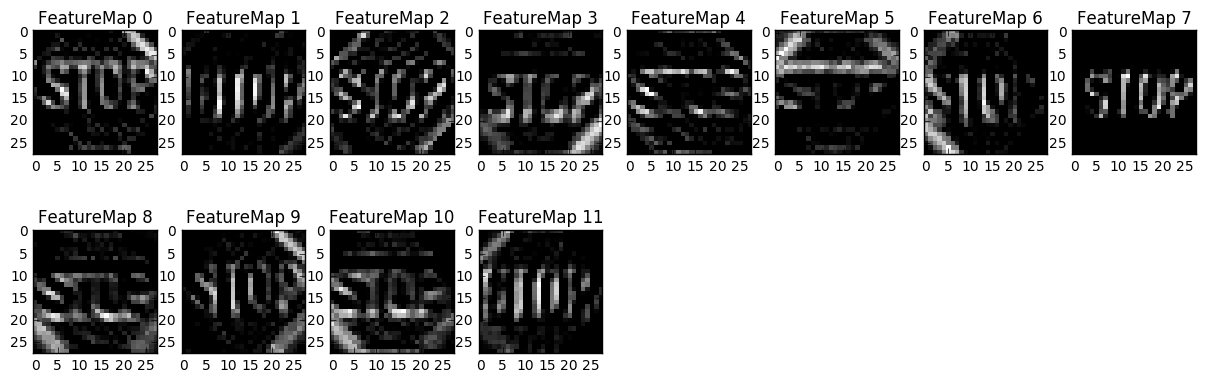

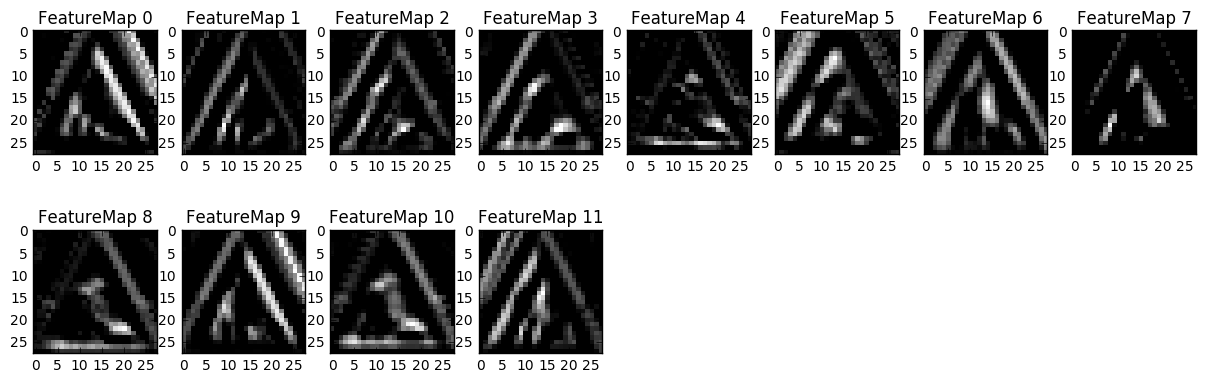

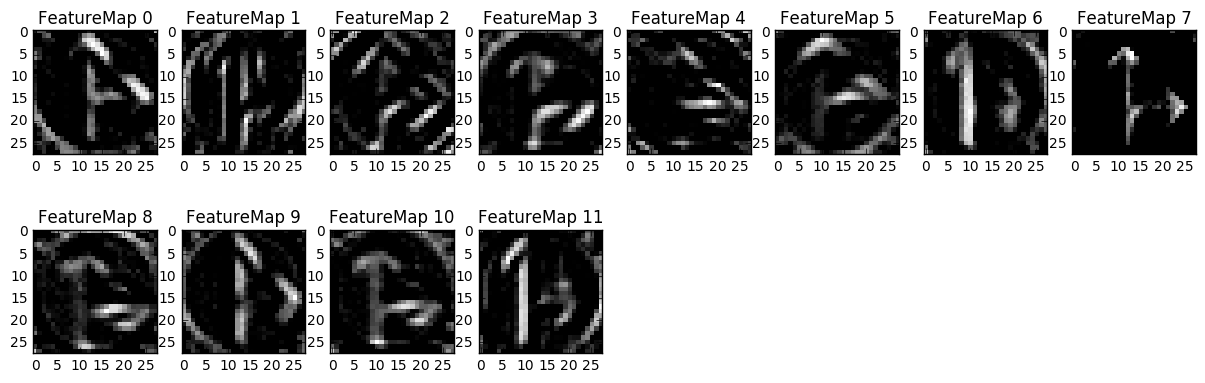

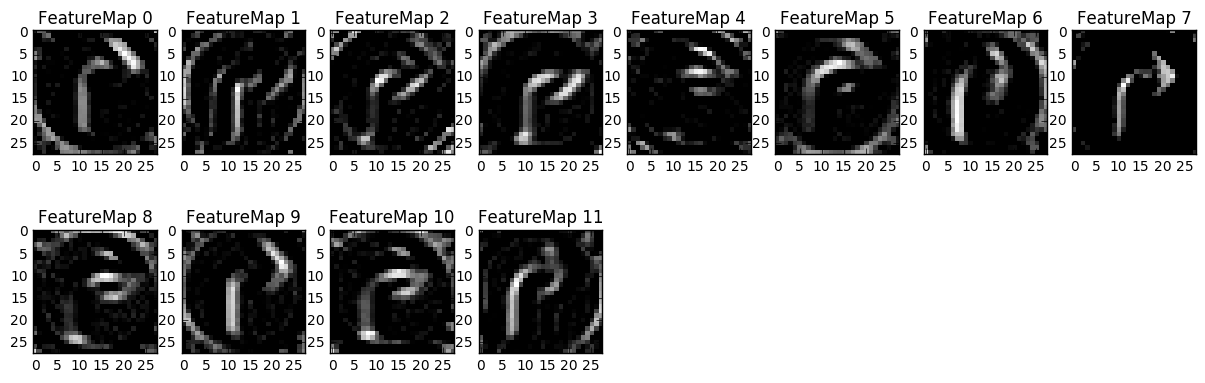

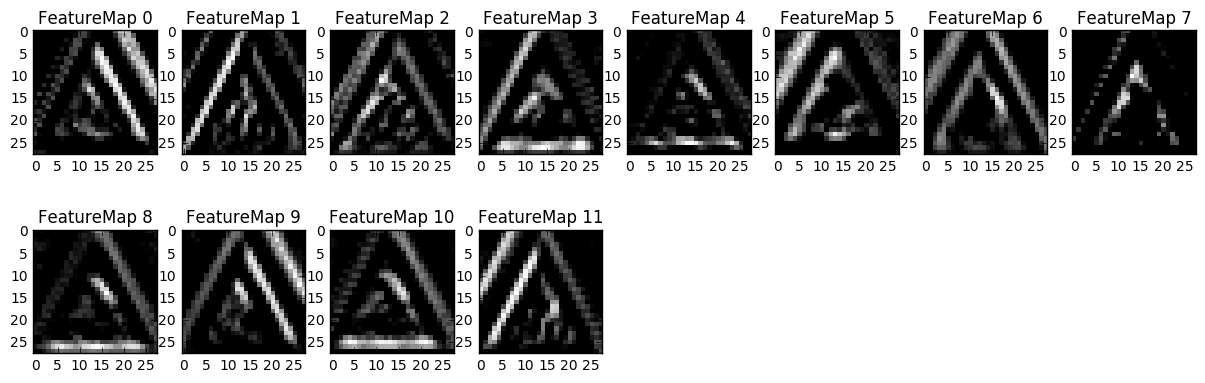

In [21]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, index, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[index,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[index,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[index,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[index,:,:, featuremap], interpolation="nearest", cmap="gray")
            


saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, './Newlenet')
    
    layer = tf.get_default_graph().get_tensor_by_name("conv1_relu:0")
    
    for i in range(len(sample_images)):
        outputFeatureMap(sample_images, i, layer, -1,-1, i)
       

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

I tried to display the feature map of a training image/sample image(obtained from web).
The reference project helped me in better visualizing my conv layers using FeatureMap.

It seems that STOP sign and Bicycle crossing are not always being recognized perfect by the model. It's very uncertain in predicting them. That can be understood from softmax probabilities and Feature Outputs of the normalized images of the new test sample. 

In contrast (2,3,4) images are almost being identified perfectly all the time due to their simpler features.

Where as From the bar graphs of Soft max probabailities STOP sign has 25 to 30 % of prediction rate after the Speed limit prediction wich has 35%.

Bicycle crossing has very minimal prediction rate.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 